In [60]:
# load two csv files
import pandas as pd
import numpy as np

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

book_info = pd.read_csv('../data/clean_data/clean_book_info.csv')
reviews_df = pd.read_csv('../data/clean_data/reviews_with_stress.csv')

# Frequency of words in reviews with stress (predicted_stress = 1)

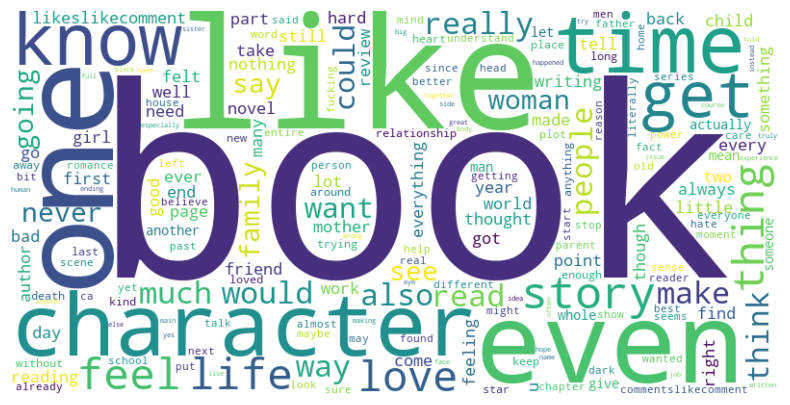

In [61]:
# filter the reviews stress=1
stress_reviews = reviews_df[reviews_df['predicted_stress'] == 1]['processed_text']

# calculate the frequency of words
words_in_stress_reviews = []
for review in stress_reviews:
    words_in_stress_reviews.extend(review.split())

word_counts_in_stress_reviews = Counter(words_in_stress_reviews)

# build a  wordcloud
wordcloud_stress = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_in_stress_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stress, interpolation='bilinear')
plt.axis('off')

wordcloud_stress.to_file("../img/wordcloud_review.png")
plt.show()


# Merge the book info data with the reviews data that includes predicted stress

In [62]:
# Merge the book info data with the reviews data that includes predicted stress
merged_review_data = pd.merge(reviews_df, book_info, on='title_id', how='left')
merged_review_data = merged_review_data.drop(columns=['title_y','processed_text']).rename(columns={'title_x':'title'})
merged_review_data.head(3)

,Unnamed: 0,title_id,title,review_no,review,predicted_stress,author,publish_date,pages,format,rating,rating_counts,reviews_counts,votes,year,description,main_genre,is_bestseller,award
0,0,111,five feet apart,1,[3.5] There’s some disagreement within the CF ...,0,Rachael Lippincott,2018-11-20,304.0,Hardcover,4.18,225066,20092,36232,2019,In this moving story two teens fall in love wi...,Literature/Fiction,1,best-young-adult-fiction-books-2019
1,1,111,five feet apart,2,Edit: For the love of God I wrote this review ...,0,Rachael Lippincott,2018-11-20,304.0,Hardcover,4.18,225066,20092,36232,2019,In this moving story two teens fall in love wi...,Literature/Fiction,1,best-young-adult-fiction-books-2019
2,2,111,five feet apart,3,Can't say I'm surprised I didn't enjoy this bo...,0,Rachael Lippincott,2018-11-20,304.0,Hardcover,4.18,225066,20092,36232,2019,In this moving story two teens fall in love wi...,Literature/Fiction,1,best-young-adult-fiction-books-2019


In [63]:
merged_review_data.shape

(16860, 19)

In [64]:
merged_review_data.dtypes

Unnamed: 0            int64
title_id              int64
title                object
review_no             int64
review               object
predicted_stress      int64
author               object
publish_date         object
pages               float64
format               object
rating              float64
rating_counts        object
reviews_counts       object
votes                 int64
year                  int64
description          object
main_genre           object
is_bestseller         int64
award                object
dtype: object

In [65]:
merged_review_data.nunique()

Unnamed: 0          16860
title_id             1686
title                1686
review_no              10
review              16811
predicted_stress        2
author               1304
publish_date          404
pages                 416
format                  8
rating                132
rating_counts        1672
reviews_counts       1577
votes                1606
year                    5
description          1686
main_genre              5
is_bestseller           2
award                  89
dtype: int64

In [66]:
merged_review_data.describe()

,Unnamed: 0,title_id,review_no,predicted_stress,pages,rating,votes,year,is_bestseller
count,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000
mean,8429.500000,3276.955516,5.500000,0.097331,345.276987,4.046459,14746.444840,2020.848161,0.254448
std,4867.207105,1165.380783,2.872367,0.296417,137.087111,0.266630,21161.583726,1.402702,0.435564
min,0.000000,111.000000,1.000000,0.000000,0.000000,3.160000,383.000000,2019.000000,0.000000
25%,4214.750000,2937.000000,3.000000,0.000000,273.000000,3.840000,2843.000000,2020.000000,0.000000
50%,8429.500000,3585.500000,5.500000,0.000000,338.000000,4.050000,7365.500000,2021.000000,0.000000
75%,12644.250000,4151.000000,8.000000,0.000000,406.000000,4.240000,19782.000000,2022.000000,1.000000
max,16859.000000,4697.000000,10.000000,1.000000,1242.000000,4.750000,397565.000000,2023.000000,1.000000


In [67]:
merged_review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        16860 non-null  int64  
 1   title_id          16860 non-null  int64  
 2   title             16860 non-null  object 
 3   review_no         16860 non-null  int64  
 4   review            16860 non-null  object 
 5   predicted_stress  16860 non-null  int64  
 6   author            16860 non-null  object 
 7   publish_date      16860 non-null  object 
 8   pages             16860 non-null  float64
 9   format            16860 non-null  object 
 10  rating            16860 non-null  float64
 11  rating_counts     16860 non-null  object 
 12  reviews_counts    16860 non-null  object 
 13  votes             16860 non-null  int64  
 14  year              16860 non-null  int64  
 15  description       16860 non-null  object 
 16  main_genre        16860 non-null  object

## Hypothesis Testing and Plots

In [ ]:
relation_df = merged_review_data[['author','publish_date','pages','format','']]

In [ ]:
corr=np.abs(df_cali.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [46]:
# Group by genre and calculate the mean stress per genre
main_genre_stress_analysis = merged_review_data.groupby('main_genre')['predicted_stress'].mean().sort_values(ascending=False)
print(main_genre_stress_analysis)


main_genre
Romance/Drama            0.114286
Fantasy/Sci-Fi/Horror    0.111785
Literature/Fiction       0.089464
Nonfiction/Education     0.050000
Other                    0.000000
Name: predicted_stress, dtype: float64


- We have mapped the detailed book genres to five broader main categories and recalculated the average stress comment percentage for each category. The results show:

  - Romance/Drama: The average percentage of stress reviews is 11.4%.
  - Fantasy/Sci-Fi/Horror: The average percentage of stress reviews is 11.2%.
  - Literature/Fiction: The average percentage of stress reviews is 8.9%.
  - Nonfiction/Education: The average percentage of stress reviews is 5.0%.
  - Other: No stress reviews.
  
- Analysis Results:
- These results indicate that books in the Romance/Drama and Fantasy/Sci-Fi/Horror categories tend to evoke higher levels of stress in readers, while books in the Nonfiction/Education category show lower levels of stress. This may be related to the depth of content and emotional engagement associated with these categories of books.

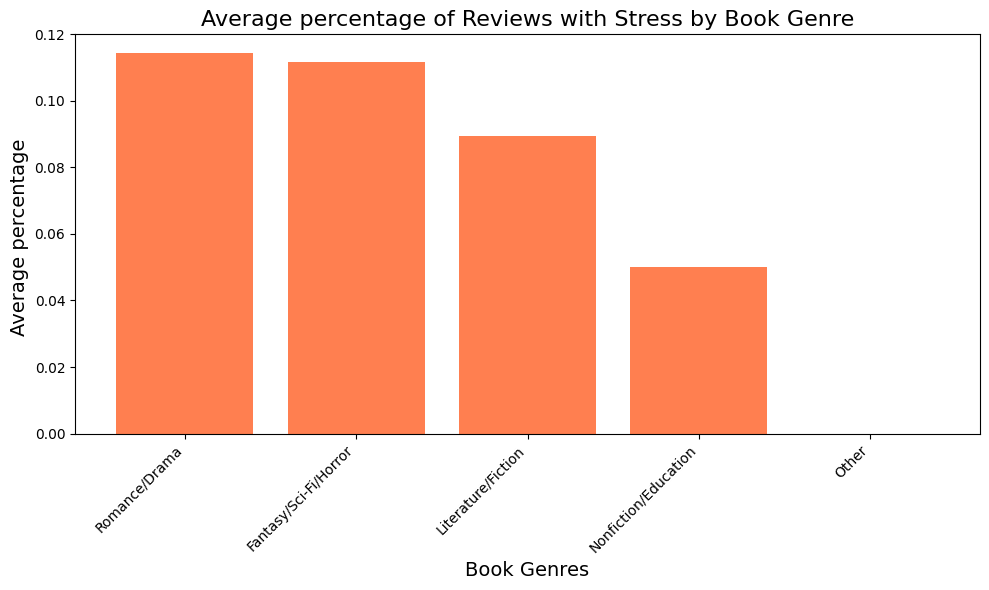

In [54]:
import matplotlib.pyplot as plt

genres = main_genre_stress_analysis.index
mean_stress = main_genre_stress_analysis.values

plt.figure(figsize=(10, 6))
plt.bar(genres, mean_stress, color='coral')
plt.xlabel('Book Genres', fontsize=14)
plt.ylabel('Average percentage ', fontsize=14)
plt.title('Average percentage of Reviews with Stress by Book Genre', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('../img/stress&genre.png')
plt.show()
